In [1]:
from coc131_cw import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
coc = COC131()

#### **Question 1 Check**

In [2]:
res1, res2 = coc.q1('AnnualCrop_1.jpg')
print(f"res1: {res1}") 
print(f"res2: {res2}")
print(f"res1 shape: {res1.shape}")


res1: [149. 121. 120. ... 106.  94. 104.]
res2: AnnualCrop
res1 shape: (3072,)


#### **Question 2 Check**

In [3]:
inp = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
standardisedData, res2 = coc.q2(inp)

print("Standardized Data:\n", standardisedData)
print("\nScaler Object:\n", res2)

Standardized Data:
 [[-3.06186218 -3.06186218 -3.06186218]
 [ 0.          0.          0.        ]
 [ 3.06186218  3.06186218  3.06186218]]

Scaler Object:
 StandardScaler()


#### **Question 3 Check**

In [4]:
best_model, best_loss_curve, best_train_curve, best_test_curve = coc.q3(test_size=0.2)

print("Final Training Accuracy:", best_train_curve[-1])
print("Final Testing Accuracy:", best_test_curve[-1])
print("Loss Curve:", best_loss_curve)


Final Training Accuracy: 0.5005555555555555
Final Testing Accuracy: 0.48388888888888887
Loss Curve: [1.84542083 1.50752659]


In [5]:
# Visualisation to show the change of acuuracy on training and testing (seperately) over each epoch

#### **Question 4 Check**

In [5]:
# Call the q4 method to get results for different alpha values
results = coc.q4(test_size=0.2)

# Debugging step: Print out the type and structure of results
print(f"Results: {results}")
print(f"Results type: {type(results)}")

# Check if the results are a dictionary
if isinstance(results, dict):
    # Iterate over all alpha values and print their corresponding metrics
    for alpha, metrics in results.items():
        print(f"Alpha: {alpha}")
        print(f"Loss Curve: {metrics['loss_curve']}")
        print(f"Training Accuracy Curve: {metrics['train_acc_curve']}")
        print(f"Testing Accuracy Curve: {metrics['test_acc_curve']}")
        print("-" * 40)
else:
    print("Error: The results returned from q4 are not in the expected dictionary format.")


Results type: <class 'dict'>
Results: {0.0001: {'loss_curve': array([1.84542083, 1.50752659]), 'train_acc_curve': array([0.41486111, 0.50055556]), 'test_acc_curve': array([0.39555556, 0.48388889])}, 0.001: {'loss_curve': array([1.8462041 , 1.50828018]), 'train_acc_curve': array([0.41472222, 0.50069444]), 'test_acc_curve': array([0.39518519, 0.48407407])}, 0.01: {'loss_curve': array([1.85408261, 1.51557853]), 'train_acc_curve': array([0.41486111, 0.50027778]), 'test_acc_curve': array([0.39666667, 0.4837037 ])}, 0.1: {'loss_curve': array([1.9324258 , 1.59441552]), 'train_acc_curve': array([0.41597222, 0.50087963]), 'test_acc_curve': array([0.39685185, 0.48092593])}, 1: {'loss_curve': array([2.71232104, 2.36944625]), 'train_acc_curve': array([0.41296296, 0.49986111]), 'test_acc_curve': array([0.39111111, 0.48185185])}}
Results type: <class 'dict'>
Alpha: 0.0001
Loss Curve: [1.84542083 1.50752659]
Training Accuracy Curve: [0.41486111 0.50055556]
Testing Accuracy Curve: [0.39555556 0.483888

In [ ]:
# visualisations to show the training and testing accuracies (seperately over time) and the effect of changing alpha on both

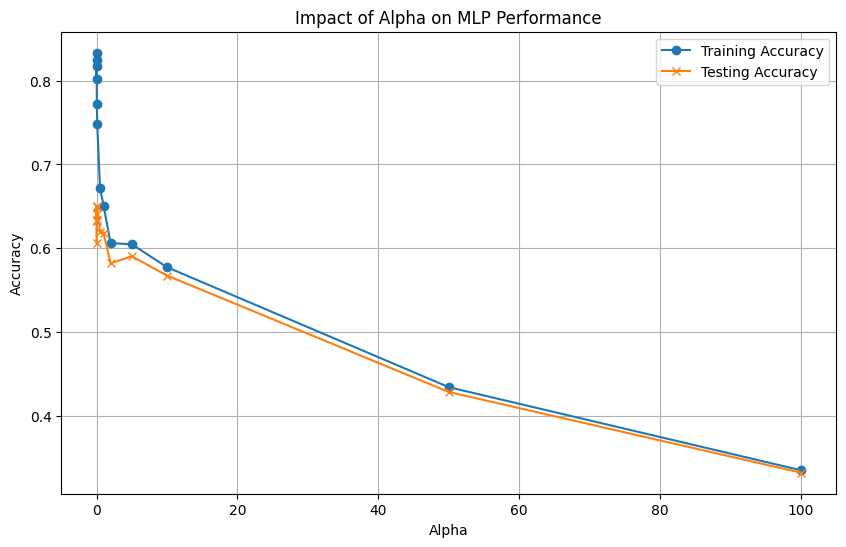

In [4]:
# Plotting the results
plt.figure(figsize=(10, 6))

# Plot training accuracies
plt.plot(res['alpha_values'], res['train_accuracies'], label='Training Accuracy', marker='o')

# Plot testing accuracies
plt.plot(res['alpha_values'], res['test_accuracies'], label='Testing Accuracy', marker='x')

# Add labels and legend
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Impact of Alpha on MLP Performance')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


#### **Question 5 Check**

In [3]:
res1, res2, res3, res4 = coc.q5()

# Print the results
print("Final Testing Accuracy without Stratification:", res1)
print("Final Testing Accuracy with Stratification:", res2)
print("P-value:", res3)
print("Conclusion:", res4)

X shape: (27000, 3072)
y shape: (27000,)
Scores without Stratification: [0.11018519 0.22944444 0.10796296 0.10574074 0.32666667]
Scores with Stratification: [0.50666667 0.22925926 0.24518519 0.42037037 0.11203704]
Final Testing Accuracy without Stratification: 0.176
Final Testing Accuracy with Stratification: 0.3027037037037037
P-value: 0.1683282466548282
Conclusion: Splitting method had no effect


In [ ]:
# visualisations to show the training and testing accuracies (seperately) per epoch

#### **Question 6 Check**

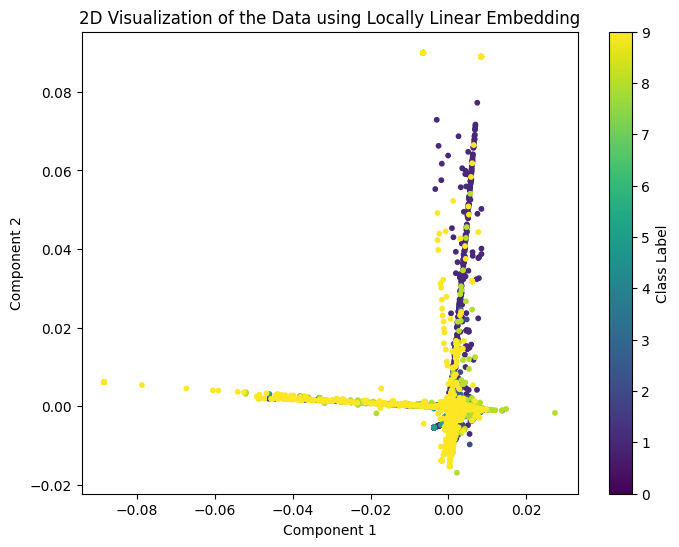

In [5]:
# Assuming coc.y contains class labels (like 'AnnualCrop', 'SeaLake', etc.)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(coc.y)  # Encode labels to integers

# Transform the data using Locally Linear Embedding (assuming coc.q6() gives 2D data)
transformed_data = coc.q6()

# Visualize the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=y_encoded, cmap='viridis', s=10)
plt.colorbar(label='Class Label')  # Color bar to indicate class labels
plt.title('2D Visualization of the Data using Locally Linear Embedding')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()
